<a href="https://colab.research.google.com/github/nidariqah/FinalProject_Zenius/blob/main/Kelompok_3_Business_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 37.8 MB 1.3 MB/s 
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152168 sha256=ad94e7c3ceb6ab10196506127b8c8c04eeec52f9b6f82b6f805eee9750b6bf99
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2


In [ ]:
df_train = pd.read_csv('HomeCredit_train.csv')

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# LOAD THE TRAINING SET
df_train.info(verbose=True, null_counts=True)

<ipython-input-23-e70d792df1dd>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_train.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298870 entries, 0 to 298869
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    298870 non-null  int64  
 1    TARGET                        298870 non-null  int64  
 2    NAME_CONTRACT_TYPE            298870 non-null  object 
 3    CODE_GENDER                   298870 non-null  object 
 4    FLAG_OWN_CAR                  298870 non-null  object 
 5    FLAG_OWN_REALTY               298870 non-null  object 
 6    CNT_CHILDREN                  298870 non-null  int64  
 7    AMT_INCOME_TOTAL              298870 non-null  float64
 8    AMT_CREDIT                    298870 non-null  float64
 9    AMT_ANNUITY                   298858 non-null  float64
 10   AMT_GOODS_PRICE               298602 non-null  float64
 11   NAME_TYPE_SUITE               297619 non-null  object 
 12   NAME_INCOME_TYPE            

0    274712
1     24158
Name: TARGET, dtype: int64


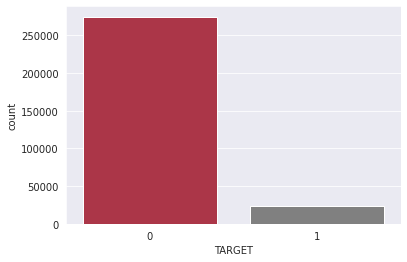

In [ ]:
# Show target distribution
sns.set_style('darkgrid')
print(df_train.TARGET.value_counts())

# Distribution of target
clrs = ['grey' if (x < max(df_train['TARGET'].value_counts())) else '#BE223A' for x in df_train['TARGET'].value_counts() ]

sns.countplot(x=df_train['TARGET'], palette = clrs, order=df_train['TARGET'].value_counts(ascending=False).index);

0 = Membayar peminjaman
1 = Tidak membayar peminjaman

In [ ]:
cash=df_train[df_train.NAME_CONTRACT_TYPE == 'Cash loans']
rev=df_train[df_train.NAME_CONTRACT_TYPE == 'Revolving loans']
def_cash=cash[cash.TARGET==1]
def_rev=rev[rev.TARGET==1]

Percentage of defaulted cash loan: 8.36 %
Percentage of defaulted revolving loan: 5.47 %


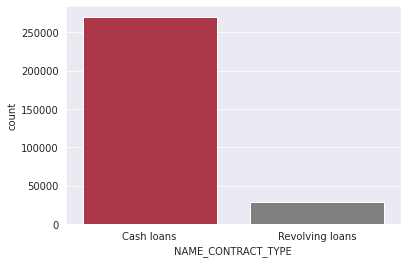

In [ ]:
# Types of Loan
print('Percentage of defaulted cash loan:',round(len(def_cash)/len(cash)*100,2,),'%')
print('Percentage of defaulted revolving loan:',round(len(def_rev)/len(rev)*100,2),'%')
clrs = ['grey' if (x < max(df_train['TARGET'].value_counts())) else '#BE223A' for x in df_train['TARGET'].value_counts() ]
ax = sns.countplot(data=df_train,x='NAME_CONTRACT_TYPE',palette=clrs,
                   order=df_train['NAME_CONTRACT_TYPE'].value_counts(ascending=False).index);

abs_values =df_train['NAME_CONTRACT_TYPE'].value_counts(ascending=False)
rel_values =df_train['NAME_CONTRACT_TYPE'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]


plt.show()

Berdasarkan jenis pinjaman, persentase klien yang mengalami default jauh lebih besar pada jenis pinjaman tunai (8.36%) dibandingkan dengan klien pada jenis pinjaman bergulir (5.47%). Namun, pinjaman tunai lebih diminati dibandingkan pinjaman bergulir. Berdasarkan hal tersebut, kita harus memperhatikan jumlah pinjaman tunai yang diberikan terhadap total pendapatan klien.

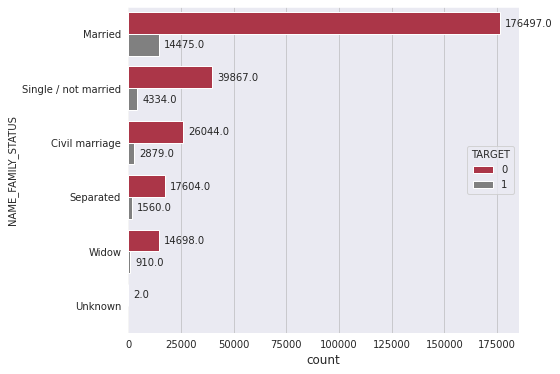

In [ ]:
# Family Status of Applicant's who applied for loan

f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['NAME_FAMILY_STATUS'].value_counts())) else '#BE223A' for x in df_train['NAME_FAMILY_STATUS'].value_counts() ]

sns.countplot(y="NAME_FAMILY_STATUS", data=df_train, hue='TARGET',palette=clrs,order =df_train['NAME_FAMILY_STATUS'].value_counts().index)

for p in ax.patches:
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

Berdasarkan status keluarga yang mengajukan pinjaman, klien yang menikah memiliki frekuensi yang tinggi dibandingkan status keluarga lainnya. Klien yang menikah pun menjadi status keluarga yang paling tinggi dalam mengalami default.

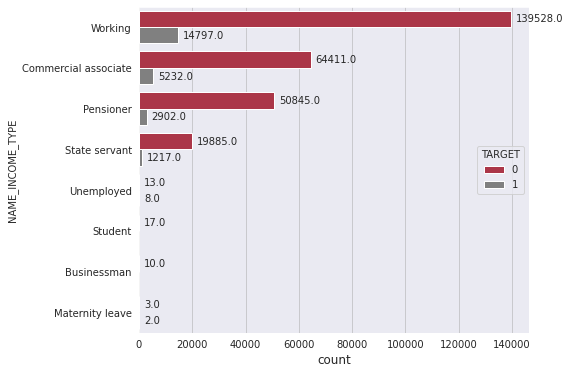

In [ ]:
# Income Type of Applicant's who applied for loan

f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['NAME_INCOME_TYPE'].value_counts())) else '#BE223A' for x in df_train['NAME_INCOME_TYPE'].value_counts() ]

sns.countplot(y="NAME_INCOME_TYPE", data=df_train, hue='TARGET',palette=clrs,order =df_train['NAME_INCOME_TYPE'].value_counts().index)

for p in ax.patches:
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

Berdasarkan jenis penghasilan klien yang mengajukan pinjaman, klien yang mendapatkan penghasilan dari bekerja memiliki frekuensi yang signifikan lebih tinggi daripada jenis penghasilan lainnya. Jenis penghasilan dari bekerja pun menjadi jenis penghasilan yang paling tinggi dalam mengalami default.

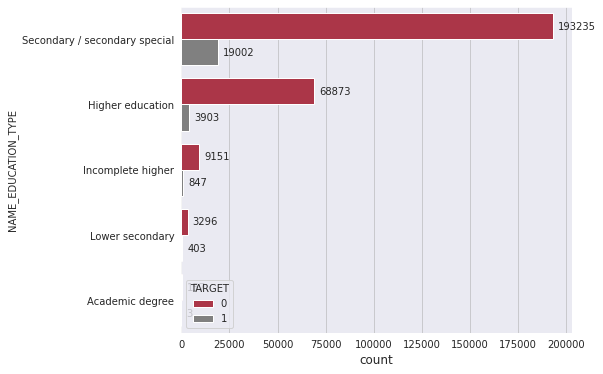

In [ ]:
# Education Type of Applicant's who applied for loan

f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['NAME_EDUCATION_TYPE'].value_counts())) else '#BE223A' for x in df_train['NAME_EDUCATION_TYPE'].value_counts() ]

sns.countplot(y="NAME_EDUCATION_TYPE", data=df_train, hue='TARGET',palette=clrs,order =df_train['NAME_EDUCATION_TYPE'].value_counts().index)

for p in ax.patches:
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

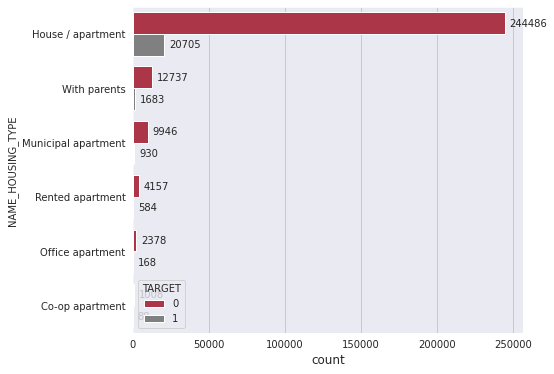

In [ ]:
# Education Type of Applicant's who applied for loan

f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['NAME_HOUSING_TYPE'].value_counts())) else '#BE223A' for x in df_train['NAME_HOUSING_TYPE'].value_counts() ]

sns.countplot(y="NAME_HOUSING_TYPE", data=df_train, hue='TARGET',palette=clrs,order =df_train['NAME_HOUSING_TYPE'].value_counts().index)

for p in ax.patches:
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

People count who owns a car: 101634 ( 34.01 %)
People count who DOES NOT own a car: 197236 ( 65.99 %)
Percentage of people who defaulted (with cars): 7.25 %
Percentage of people who defaulted (no cars): 8.51 %


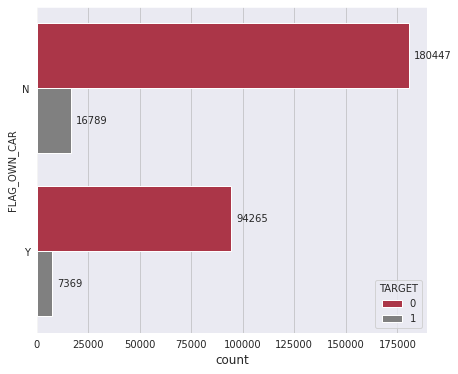

In [ ]:
tempY=df_train[df_train.FLAG_OWN_CAR=='Y']
tempN=df_train[df_train.FLAG_OWN_CAR=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['FLAG_OWN_CAR'].value_counts())) else '#BE223A' for x in df_train['FLAG_OWN_CAR'].value_counts() ]

sns.countplot(y="FLAG_OWN_CAR", data=df_train, hue='TARGET',palette=clrs,order =df_train['FLAG_OWN_CAR'].value_counts().index)

for p in ax.patches:
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

print('People count who owns a car:',len(tempY),'(',round(len(tempY)/len(df_train.index)*100,2),'%)')
print('People count who DOES NOT own a car:',len(tempN),'(',round(len(tempN)/len(df_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with cars):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no cars):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

Klien yang tidak memiliki mobil cenderung akan mengalami default daripada klien yang memiliki mobil. Dapat dilihat bahwa persentase klien yang tidak memiliki mobil mengalami default lebih tinggi 1.26% dibandingkan klien yang memiliki mobil.

People count who owns realty: 207262 ( 69.35 %)
People count who DOES NOT own realty: 91608 ( 30.65 %)
Percentage of people who defaulted (with realty): 7.98 %
Percentage of people who defaulted (no realty): 8.32 %


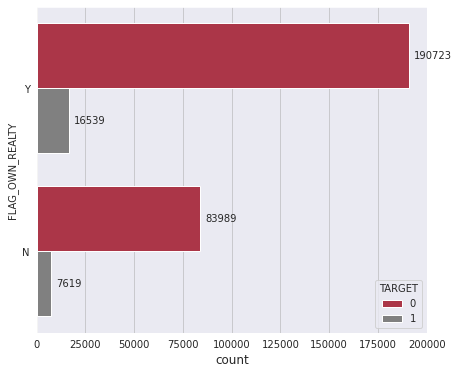

In [ ]:
tempY=df_train[df_train.FLAG_OWN_REALTY=='Y']
tempN=df_train[df_train.FLAG_OWN_REALTY=='N']
tempY_targ1=tempY[tempY.TARGET==1]
tempN_targ1=tempN[tempN.TARGET==1]

f, ax = plt.subplots(figsize=(7, 6))

clrs = ['grey' if (x < max(df_train['FLAG_OWN_REALTY'].value_counts())) else '#BE223A' for x in df_train['FLAG_OWN_REALTY'].value_counts() ]

sns.countplot(y="FLAG_OWN_REALTY", data=df_train, hue='TARGET',palette=clrs,order =df_train['FLAG_OWN_REALTY'].value_counts().index)

for p in ax.patches:
  ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
              xytext=(5, 0), textcoords='offset points', ha="left", va="center")

print('People count who owns realty:',len(tempY),'(',round(len(tempY)/len(df_train.index)*100,2),'%)')
print('People count who DOES NOT own realty:',len(tempN),'(',round(len(tempN)/len(df_train.index)*100,2),'%)')
print('Percentage of people who defaulted (with realty):',round(len(tempY_targ1)/len(tempY)*100,2),'%')
print('Percentage of people who defaulted (no realty):',round(len(tempN_targ1)/len(tempN)*100,2),'%')

plt.grid(color='darkgray', axis='x', linestyle='-', linewidth=0.5)
plt.xlabel('count', fontsize=12)
plt.show()

Klien yang tidak memiliki rumah cenderung akan mengalami default daripada klien yang memiliki rumah. Dapat dilihat bahwa persentase klien yang tidak memiliki rumah mengalami default lebih tinggi 0.34% dibandingkan klien yang memiliki rumah.